Write a function that takes the femur length, brain volume, cerebrum width, whole brain width, and gives a prediction on whether its a bird or a non avion dinosaur.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bird_dino_data.csv")
df.head(10)

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08
5,6,D,85.96,0.569,9.52,3.60,5.16,3.78
6,7,D,0.50,0.077,0.60,0.36,0.24,0.17
7,8,B,0.90,0.234,5.95,0.99,0.96,0.55
8,9,B,0.26,0.027,8.36,1.40,1.63,0.86
9,10,D,12.61,0.028,3.71,1.31,1.60,2.17


In [3]:
#Find the brain volume by adding all the brain parts and make a new column called "Whole Brain".
df["Whole Brain"] = df["Olfactory bulbs (cm3)"] + df["Cerebrum (cm3)"] + df["Optic Lobes (cm3)"] + df["Cerebellum (cm3)"]+ df["Brain Stem (cm3)"]
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193


In [4]:
#Make a new column that has the brain to body mass.
#Make a column for cerebrum to whole brain.
#cm cubed is equal to a gram
df["Brain to Mass"] = df["Whole Brain"] / (df["Body Mass (kg)"] * 1000)
df["Cerebrum to Brain"] = df["Cerebrum (cm3)"] / df["Whole Brain"]
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Brain to Mass,Cerebrum to Brain
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959,0.097950,0.781011
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036,0.017489,0.762843
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096,0.006925,0.733969
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830,0.003320,0.493976
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193,0.219300,0.715914


In [5]:
#Make seperate data frames into dino and birds.
df_dino = df.loc[df["Bird vs Dino"] == "D"]
df_dino

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Brain to Mass,Cerebrum to Brain
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830,0.003320,0.493976
5,6,D,85.96,0.569,9.52,3.60,5.16,3.78,22.629,0.000263,0.420699
6,7,D,0.50,0.077,0.60,0.36,0.24,0.17,1.447,0.002894,0.414651
9,10,D,12.61,0.028,3.71,1.31,1.60,2.17,8.818,0.000699,0.420730
14,15,D,49.30,1.080,14.81,4.75,3.16,2.35,26.150,0.000530,0.566348
19,20,D,15.95,0.042,1.61,0.70,0.31,0.40,3.062,0.000192,0.525800
21,22,D,0.92,0.021,1.38,0.87,0.50,0.33,3.101,0.003371,0.445018


In [6]:
df_bird = df.loc[df["Bird vs Dino"] == "B"]
df_bird

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Brain to Mass,Cerebrum to Brain
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959,0.097950,0.781011
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036,0.017489,0.762843
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096,0.006925,0.733969
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193,0.219300,0.715914
7,8,B,0.90,0.234,5.95,0.99,0.96,0.55,8.684,0.009649,0.685168
8,9,B,0.26,0.027,8.36,1.40,1.63,0.86,12.277,0.047219,0.680948
10,11,B,0.17,0.015,6.09,0.88,1.62,0.49,9.095,0.053500,0.669599
11,12,B,0.43,0.206,9.45,1.44,2.40,0.85,14.346,0.033363,0.658720
12,13,B,0.05,0.008,1.63,0.41,0.26,0.17,2.478,0.049560,0.657789
13,14,B,59.30,0.274,36.85,7.61,6.45,5.13,56.314,0.000950,0.654367


In [7]:
#Find average of each new column
dinomeanb = (df_dino["Brain to Mass"].mean())
dinomeanc =(df_dino["Cerebrum to Brain"].mean())
print(dinomeanb)
print(dinomeanc)

0.0016099413841087278
0.4696031703064059


In [8]:
birdmeanb = (df_bird["Brain to Mass"].mean())
birdmeanc =(df_bird["Cerebrum to Brain"].mean())
print(birdmeanb)
print(birdmeanc)

0.04781897158703077
0.6650761062786563


In [9]:
#Compare your brain average to each average.

In [10]:
def convert(dtype, FL):
    if dtype == "ornithischian":
        return 10**(3.0587*np.log10(FL)-2.7042)/1000
    elif dtype == "sauropod":
        return 10**(2.3459*np.log10(FL)-0.2935)/1000
    elif dtype == "theropod":
        return 10**(3.1854*np.log10(FL)-3.184)/1000

In [11]:
our_dino = convert("theropod", 350)* 1000
print(our_dino)

83152.31572461473


In [12]:
BraintoBod = (22.6 / (our_dino))
print(BraintoBod)

0.0002717903861492814


In [20]:
CtoB = 35/99
print(CtoB)
OurBrain = 9.9

0.35353535353535354


In [14]:
#Based on cerebrum to whole brain
def bord(cerebrumw, brainw):
    CtoB = cerebrumw / brainw
    birds = abs(birdmeanc - CtoB)
    dinos = abs(dinomeanc - CtoB)
    if birds > dinos:
        result = "Closer to Dinosaur"
    elif dinos > birds:
        result = "Closer to Bird"
    return result

In [15]:
bord(35, 99)

'Closer to Dinosaur'

In [16]:
def BorD_2(ratio):
    if abs(ratio - birdmeanb) > abs(ratio - dinomeanb):
        result = "Closer to Dinosaur"
    elif abs(ratio - dinomeanb) > abs(ratio - birdmeanb):
        result = "Closer to Bird"
    return result

In [17]:
BorD_2(BraintoBod)

'Closer to Dinosaur'

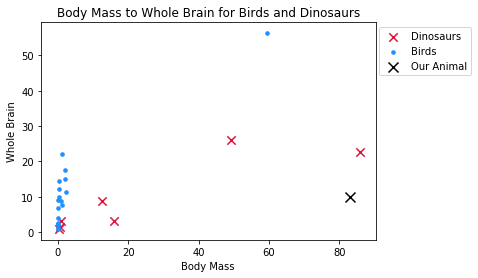

In [70]:
plt.scatter(df_dino["Body Mass (kg)"], df_dino["Whole Brain"], c = "crimson", label = "Dinosaurs", marker = "x", s = 70)
plt.scatter(df_bird["Body Mass (kg)"], df_bird["Whole Brain"], c = "dodgerblue", label = "Birds", marker = ".", s = 50)
plt.scatter(our_dino/1000, OurBrain, marker = "x", c = "black", s =100, label = "Our Animal")
plt.legend(bbox_to_anchor = [1.3, 1.0])
plt.ylabel("Whole Brain")
plt.xlabel("Body Mass")
plt.title("Body Mass to Whole Brain for Birds and Dinosaurs")
plt.savefig("BodyMass_to_WholeBrain_for_Birds_and_Dinosaurs.png", dpi = 1000)
plt.show()

In [35]:
def BirdvsDino (FL, BV, CW, BW):
    BM = (10**(3.1854*np.log10(FL)-3.184)/1000) * 1000
    ratio = BV / BM
    if abs(ratio - birdmeanb) > abs(ratio - dinomeanb):
        result = "Closer to Dinosaur based on brain to body ratio"
    elif abs(ratio - dinomeanb) > abs(ratio - birdmeanb):
        result = "Closer to Bird based on brain to body ratio"
    CtoB = CW / BW
    birds = abs(birdmeanc - CtoB)
    dinos = abs(dinomeanc - CtoB)
    if birds > dinos:
        result2 = "Closer to Dinosaur based on Cerebrum to brain ratio"
    elif dinos > birds:
        result2 = "Closer to Bird based on Cerebrum to brain ratio"
    return result, result2
    

In [38]:
BirdvsDino(350, 22.6, 35, 99)

('Closer to Dinosaur based on brain to body ratio',
 'Closer to Dinosaur based on Cerebrum to brain ratio')